In [72]:
#importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [73]:
#importing traffic collisions dataset from DataLA (https://data.lacity.org/Public-Safety/Crime-Data-from-2010-to-2019/63jg-8b9z/about_data
#                                                  https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8/about_data)
df1 = pd.read_csv('/Users/vinitbhanushali/Desktop/Projects/LA_Crime /Crime_Data_from_2010_to_2019_20240504.csv')
df2 = pd.read_csv('/Users/vinitbhanushali/Desktop/Projects/LA_Crime /Crime_Data_from_2020_to_Present_20240504.csv')

df1.head(10)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488
5,100100506,01/05/2010 12:00:00 AM,01/04/2010 12:00:00 AM,1650,1,Central,162,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),...,AA,Adult Arrest,442.0,NaN,NaN,NaN,700 W 7TH ST,NaN,34.0480,-118.2577
6,100100508,01/08/2010 12:00:00 AM,01/07/2010 12:00:00 AM,2005,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,NaN,NaN,NaN,PICO BL,GRAND AV,34.0389,-118.2643
7,100100509,01/09/2010 12:00:00 AM,01/08/2010 12:00:00 AM,2100,1,Central,157,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,AA,Adult Arrest,230.0,NaN,NaN,NaN,500 CROCKER ST,NaN,34.0435,-118.2427
8,100100510,01/09/2010 12:00:00 AM,01/09/2010 12:00:00 AM,230,1,Central,171,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,800 W OLYMPIC BL,NaN,34.0450,-118.2640
9,100100511,01/09/2010 12:00:00 AM,01/06/2010 12:00:00 AM,2100,1,Central,132,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,998.0,NaN,NaN,200 S OLIVE ST,NaN,34.0538,-118.2488


In [74]:
#comparing column names to ensure proper concatenation of the two datasets
columns_df1 = set(df1.columns)
columns_df2 = set(df2.columns)

common_columns = columns_df1.intersection(columns_df2)
unique_columns_df1 = columns_df1.difference(columns_df2)
unique_columns_df2 = columns_df2.difference(columns_df1)

#printing common and unique columns
print("Common columns:", common_columns)
print("\nColumns unique to df1:", unique_columns_df1)
print("Columns unique to df2:", unique_columns_df2)

Common columns: {'Vict Age', 'Vict Descent', 'Premis Desc', 'Mocodes', 'Status', 'Crm Cd 3', 'AREA NAME', 'Premis Cd', 'Status Desc', 'LAT', 'Vict Sex', 'DR_NO', 'Crm Cd', 'Cross Street', 'Part 1-2', 'LON', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'LOCATION', 'Rpt Dist No', 'Weapon Used Cd', 'Weapon Desc', 'Crm Cd Desc', 'Crm Cd 1', 'Crm Cd 4', 'Crm Cd 2'}

Columns unique to df1: {'AREA '}
Columns unique to df2: {'AREA'}


In [75]:
#renaming the unique columns from each dataset to match
df1.rename(columns={'AREA ': 'AREA'}, inplace = True)

#combining matching datasets into one cohesive dataset for easier analysis
df = pd.concat([df1, df2], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2882706 entries, 0 to 2882705
Data columns (total 28 columns):
 #   Column          Dtype  
---  ------          -----  
 0   DR_NO           int64  
 1   Date Rptd       object 
 2   DATE OCC        object 
 3   TIME OCC        int64  
 4   AREA            int64  
 5   AREA NAME       object 
 6   Rpt Dist No     int64  
 7   Part 1-2        int64  
 8   Crm Cd          int64  
 9   Crm Cd Desc     object 
 10  Mocodes         object 
 11  Vict Age        int64  
 12  Vict Sex        object 
 13  Vict Descent    object 
 14  Premis Cd       float64
 15  Premis Desc     object 
 16  Weapon Used Cd  float64
 17  Weapon Desc     object 
 18  Status          object 
 19  Status Desc     object 
 20  Crm Cd 1        float64
 21  Crm Cd 2        float64
 22  Crm Cd 3        float64
 23  Crm Cd 4        float64
 24  LOCATION        object 
 25  Cross Street    object 
 26  LAT             float64
 27  LON             float64
dtypes: float64(8

In [76]:
#converting date and time data into datetime formats for easier analysis
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

#adding leading zeroes for military time conversions
df['TIME OCC'] = df['TIME OCC'].astype(str).str.zfill(4)

/var/folders/_c/dryy8y6545g9lbd6jb2d5g200000gn/T/ipykernel_85459/1008417518.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/var/folders/_c/dryy8y6545g9lbd6jb2d5g200000gn/T/ipykernel_85459/1008417518.py:3: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [77]:
df.head(2)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,2010-02-20,2010-02-20,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,2010-09-13,2010-09-12,0045,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962


In [78]:
#replacing column names for a standarized naming convention
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.rename(columns={'lat': 'latitude',
                   'lon': 'longitude',
                   'rpt_dist_no':'rdistrict_no',
                   'crm_cd':'crime_code',
                   'crm_cd_desc':'crime_desc',
                   'premis_cd':'premise_code',
                   'weapon_used_cd':'weapon_code'}, inplace = True)
df.drop(columns={'part_1-2'}, inplace = True)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2882706 entries, 0 to 2882705
Data columns (total 27 columns):
 #   Column        Dtype         
---  ------        -----         
 0   dr_no         int64         
 1   date_rptd     datetime64[ns]
 2   date_occ      datetime64[ns]
 3   time_occ      object        
 4   area          int64         
 5   area_name     object        
 6   rdistrict_no  int64         
 7   crime_code    int64         
 8   crime_desc    object        
 9   mocodes       object        
 10  vict_age      int64         
 11  vict_sex      object        
 12  vict_descent  object        
 13  premise_code  float64       
 14  premis_desc   object        
 15  weapon_code   float64       
 16  weapon_desc   object        
 17  status        object        
 18  status_desc   object        
 19  crm_cd_1      float64       
 20  crm_cd_2      float64       
 21  crm_cd_3      float64       
 22  crm_cd_4      float64       
 23  location      object        
 24

In [80]:
#replacing letter code with corresponding ethnicity
ethnicity_mapping = {
    'A': 'Other Asian',
    'B': 'Black',
    'C': 'Chinese',
    'D': 'Cambodian',
    'F': 'Filipino',
    'G': 'Guamanian',
    'H': 'Hispanic/Latin/Mexican',
    'I': 'American Indian/Alaskan Native',
    'J': 'Japanese',
    'K': 'Korean',
    'L': 'Laotian',
    'O': 'Other',
    'P': 'Pacific Islander',
    'S': 'Samoan',
    'U': 'Hawaiian',
    'V': 'Vietnamese',
    'W': 'White',
    'X': 'Unknown',
    'Z': 'Asian Indian'
}
vict_ethnicity = []
for ethnicity in df['vict_descent']:
    vict_ethnicity.append(ethnicity_mapping.get(ethnicity))

#replacing letter code with corresponding sex
vict_sex = []
for sex in df['vict_sex']:
    if sex == 'M':
        vict_sex.append('Male')
    elif sex == 'F':
        vict_sex.append('Female')
    else:
        vict_sex.append('Unknown')

#replacing descent column with ethnicity column
df.rename(columns={'vict_descent': 'vict_ethnicity'}, inplace=True)
df['vict_ethnicity'] = vict_ethnicity
df['vict_sex'] = vict_sex

In [81]:
#checking missing values and dropping
list = []

for row in df.columns:
  columns = df.columns
  instances = df[row].count()
  unique = df[row].nunique()
  nulls = df[row].isnull().sum()
  duplicates = df[row].duplicated().sum()
  list.append([instances, unique, nulls, duplicates])

data_breakdown = pd.DataFrame(list, columns=['instances','unique','nulls','duplicates'], index = columns)
data_breakdown

,instances,unique,nulls,duplicates
dr_no,2882706,2536526,0,346180
date_rptd,2882706,5483,0,2877223
date_occ,2882706,5478,0,2877228
time_occ,2882706,1439,0,2881267
area,2882706,21,0,2882685
area_name,2882706,21,0,2882685
rdistrict_no,2882706,1297,0,2881409
crime_code,2882706,143,0,2882563
crime_desc,2882706,143,0,2882563
mocodes,2530613,655268,352093,2227437


In [82]:
#saving cleaned and standarized dataframe into a csv
#df.to_csv('crime_data_2010-Present.csv', index=False)

In [83]:
df.head(15)

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rdistrict_no,crime_code,crime_desc,mocodes,...,status,status_desc,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,location,cross_street,latitude,longitude
0,1307355,2010-02-20,2010-02-20,1350,13,Newton,1385,900,VIOLATION OF COURT ORDER,0913 1814 2000,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,2010-09-13,2010-09-12,0045,14,Pacific,1485,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,2010-08-09,2010-08-09,1515,13,Newton,1324,946,OTHER MISCELLANEOUS CRIME,0344,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,2010-01-05,2010-01-05,0150,6,Hollywood,646,900,VIOLATION OF COURT ORDER,1100 0400 1402,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,2010-01-03,2010-01-02,2100,1,Central,176,122,"RAPE, ATTEMPTED",0400,...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488
5,100100506,2010-01-05,2010-01-04,1650,1,Central,162,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),0344 1402,...,AA,Adult Arrest,442.0,NaN,NaN,NaN,700 W 7TH ST,NaN,34.0480,-118.2577
6,100100508,2010-01-08,2010-01-07,2005,1,Central,182,330,BURGLARY FROM VEHICLE,0344,...,IC,Invest Cont,330.0,NaN,NaN,NaN,PICO BL,GRAND AV,34.0389,-118.2643
7,100100509,2010-01-09,2010-01-08,2100,1,Central,157,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0416,...,AA,Adult Arrest,230.0,NaN,NaN,NaN,500 CROCKER ST,NaN,34.0435,-118.2427
8,100100510,2010-01-09,2010-01-09,0230,1,Central,171,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0400 0416,...,IC,Invest Cont,230.0,NaN,NaN,NaN,800 W OLYMPIC BL,NaN,34.0450,-118.2640
9,100100511,2010-01-09,2010-01-06,2100,1,Central,132,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0344 1402,...,IC,Invest Cont,341.0,998.0,NaN,NaN,200 S OLIVE ST,NaN,34.0538,-118.2488


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2882706 entries, 0 to 2882705
Data columns (total 27 columns):
 #   Column          Dtype         
---  ------          -----         
 0   dr_no           int64         
 1   date_rptd       datetime64[ns]
 2   date_occ        datetime64[ns]
 3   time_occ        object        
 4   area            int64         
 5   area_name       object        
 6   rdistrict_no    int64         
 7   crime_code      int64         
 8   crime_desc      object        
 9   mocodes         object        
 10  vict_age        int64         
 11  vict_sex        object        
 12  vict_ethnicity  object        
 13  premise_code    float64       
 14  premis_desc     object        
 15  weapon_code     float64       
 16  weapon_desc     object        
 17  status          object        
 18  status_desc     object        
 19  crm_cd_1        float64       
 20  crm_cd_2        float64       
 21  crm_cd_3        float64       
 22  crm_cd_4        fl

In [85]:
# Checking missing values percentage
missing_percent = df.isnull().sum() / len(df) * 100
print(missing_percent)

# Example: Dropping columns or rows with too many missing values (optional)
# Drop rows where latitude or longitude is missing
df = df.dropna(subset=['latitude', 'longitude'])


dr_no              0.000000
date_rptd          0.000000
date_occ           0.000000
time_occ           0.000000
area               0.000000
area_name          0.000000
rdistrict_no       0.000000
crime_code         0.000000
crime_desc         0.000000
mocodes           12.213975
vict_age           0.000000
vict_sex           0.000000
vict_ethnicity    11.063008
premise_code       0.001769
premis_desc        0.027162
weapon_code       66.610504
weapon_desc       66.610504
status             0.000069
status_desc        0.000000
crm_cd_1           0.000763
crm_cd_2          93.202012
crm_cd_3          99.801124
crm_cd_4          99.994450
location           0.000000
cross_street      83.594616
latitude           0.000000
longitude          0.000000
dtype: float64


In [86]:
# Convert 'time_occ' into a datetime format (24-hour)
df['time_occ'] = df['time_occ'].astype(str).str.zfill(4)  # Ensure 4-digit time format
df['hour_occ'] = df['time_occ'].str[:2].astype(int)       # Extract hour
df['minute_occ'] = df['time_occ'].str[2:].astype(int)     # Extract minute


In [87]:
# Map ethnicities
df['vict_ethnicity'] = df['vict_ethnicity'].map(ethnicity_mapping)


In [88]:
# Rename columns (optional)
df.rename(columns={
    'crime_desc': 'Crime Description',
    'premis_desc': 'Premise Description',
    'weapon_desc': 'Weapon Description'
}, inplace=True)


In [89]:
# Top 10 crimes
top_crimes = df['Crime Description'].value_counts().head(10)
print(top_crimes)


Crime Description
VEHICLE - STOLEN                                           257095
BATTERY - SIMPLE ASSAULT                                   241933
BURGLARY FROM VEHICLE                                      207429
THEFT PLAIN - PETTY ($950 & UNDER)                         187769
BURGLARY                                                   186074
THEFT OF IDENTITY                                          173241
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    158471
INTIMATE PARTNER - SIMPLE ASSAULT                          148623
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             137674
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)            121703
Name: count, dtype: int64


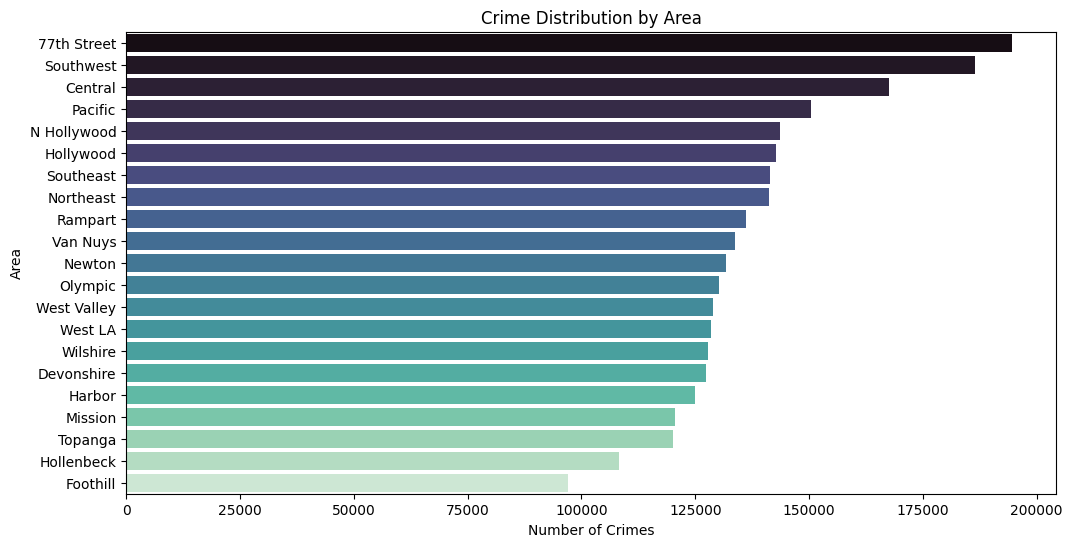

In [90]:
# Crimes by area
area_crimes = df['area_name'].value_counts()

# Plot
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.barplot(x=area_crimes.values, y=area_crimes.index, palette="mako")
plt.title("Crime Distribution by Area")
plt.xlabel("Number of Crimes")
plt.ylabel("Area")
plt.show()


In [91]:
'''# Create a year column
df['year_occ'] = df['date_occ'].dt.year

# Group by year
crimes_per_year = df.groupby('year_occ').size()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=crimes_per_year.index, y=crimes_per_year.values, marker='o')
plt.title("Crime Trends Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.grid(True)
plt.show()'''


'# Create a year column\ndf[\'year_occ\'] = df[\'date_occ\'].dt.year\n\n# Group by year\ncrimes_per_year = df.groupby(\'year_occ\').size()\n\n# Plot\nplt.figure(figsize=(10, 5))\nsns.lineplot(x=crimes_per_year.index, y=crimes_per_year.values, marker=\'o\')\nplt.title("Crime Trends Over Years")\nplt.xlabel("Year")\nplt.ylabel("Number of Crimes")\nplt.grid(True)\nplt.show()'

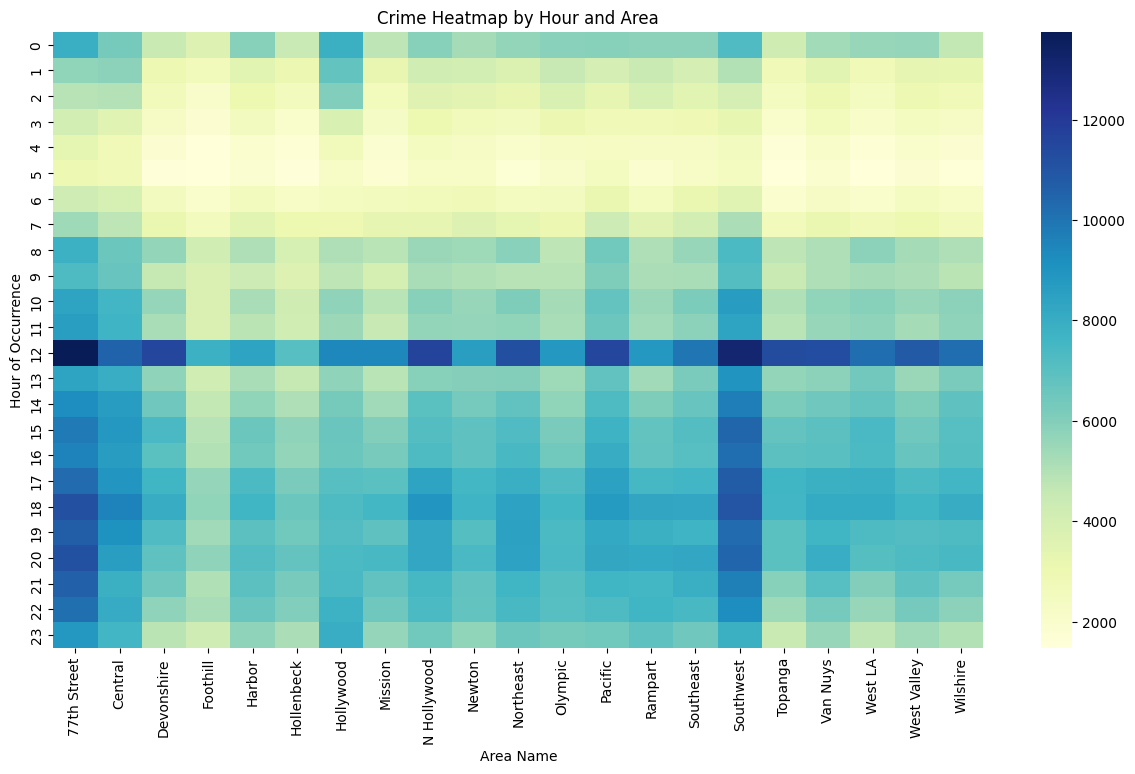

In [92]:
# Create pivot table
heatmap_data = df.pivot_table(index='hour_occ', columns='area_name', values='dr_no', aggfunc='count', fill_value=0)

# Plot heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=False)
plt.title("Crime Heatmap by Hour and Area")
plt.xlabel("Area Name")
plt.ylabel("Hour of Occurrence")
plt.show()


In [93]:
'''import plotly.express as px

# Filter out rows with zero longitude or latitude
filtered_df = df[(df['longitude'] != 0) & (df['latitude'] != 0)]

# Interactive scatter map
fig = px.scatter_mapbox(
    filtered_df,
    lat='latitude',
    lon='longitude',
    hover_name='Crime Description',
    hover_data=['area_name', 'date_occ', 'time_occ'],
    color_discrete_sequence=["blue"],  # Set a consistent color
    zoom=10,
    height=600,
    title="Filtered Crime Locations in LA"
)

# Set Mapbox style
fig.update_layout(mapbox_style="carto-positron")
fig.show()'''



'import plotly.express as px\n\n# Filter out rows with zero longitude or latitude\nfiltered_df = df[(df[\'longitude\'] != 0) & (df[\'latitude\'] != 0)]\n\n# Interactive scatter map\nfig = px.scatter_mapbox(\n    filtered_df,\n    lat=\'latitude\',\n    lon=\'longitude\',\n    hover_name=\'Crime Description\',\n    hover_data=[\'area_name\', \'date_occ\', \'time_occ\'],\n    color_discrete_sequence=["blue"],  # Set a consistent color\n    zoom=10,\n    height=600,\n    title="Filtered Crime Locations in LA"\n)\n\n# Set Mapbox style\nfig.update_layout(mapbox_style="carto-positron")\nfig.show()'

In [94]:
import plotly.express as px

# Create a DataFrame for yearly trends
df['year_occ'] = df['date_occ'].dt.year
crimes_per_year = df.groupby('year_occ').size().reset_index(name='crime_count')

# Interactive line plot
fig = px.line(crimes_per_year, x='year_occ', y='crime_count',
              title="Crime Trends Over Years",
              labels={'year_occ': 'Year', 'crime_count': 'Number of Crimes'})
fig.update_traces(mode='lines+markers')
fig.show()


In [95]:
# Crime counts by area
area_crimes = df['area_name'].value_counts().reset_index()
area_crimes.columns = ['Area', 'Crime Count']

# Interactive bar plot
fig = px.bar(area_crimes, x='Crime Count', y='Area', orientation='h',
             title="Crime Distribution by Area",
             labels={'Crime Count': 'Number of Crimes', 'Area': 'Area'},
             color='Crime Count', color_continuous_scale='Viridis')
fig.show()


In [96]:
# Create pivot table
heatmap_data = df.pivot_table(index='hour_occ', columns='area_name', values='dr_no', aggfunc='count', fill_value=0).reset_index()

# Convert pivot table to long format
heatmap_long = heatmap_data.melt(id_vars='hour_occ', var_name='Area', value_name='Crime Count')

# Interactive heatmap
fig = px.density_heatmap(heatmap_long, x='Area', y='hour_occ', z='Crime Count',
                         title="Crime Heatmap by Hour and Area",
                         labels={'hour_occ': 'Hour of Occurrence', 'Area': 'Area', 'Crime Count': 'Crime Count'},
                         color_continuous_scale='YlGnBu')
fig.show()


In [97]:
# Filter data to avoid overloading the map (optional, e.g., 10,000 random points)
map_data = df.sample(10000, random_state=42)

# Interactive scatter map
fig = px.scatter_mapbox(map_data, lat='latitude', lon='longitude',
                        hover_name='Crime Description', hover_data=['area_name', 'date_occ', 'time_occ'],
                        color_discrete_sequence=["fuchsia"], zoom=10, height=600)

# Set Mapbox style
fig.update_layout(mapbox_style="carto-positron", title="Crime Locations in LA")
fig.show()


In [98]:
'''# Save the entire dataset to a CSV file
file_name = "crime_data_extracted.csv"  # Specify the file name
df.to_csv(file_name, index=False)

print(f"Data has been successfully saved to {file_name}")'''


'# Save the entire dataset to a CSV file\nfile_name = "crime_data_extracted.csv"  # Specify the file name\ndf.to_csv(file_name, index=False)\n\nprint(f"Data has been successfully saved to {file_name}")'

In [99]:
# Convert 'month_year' to string format
crime_trends['month_year'] = crime_trends['month_year'].astype(str)

# Plot the trend
fig = px.line(crime_trends, x='month_year', y='Crime Count', 
              title="Crime Trends Over Time", labels={'month_year': 'Month-Year'})
fig.update_xaxes(rangeslider_visible=True)
fig.show()


NameError: name 'crime_trends' is not defined

In [ ]:
# Group by area and count occurrences
area_counts = df['area_name'].value_counts().reset_index()
area_counts.columns = ['Area', 'Crime Count']

# Plot bar chart
fig = px.bar(area_counts, x='Area', y='Crime Count', 
             title="Crime Count by Area", text='Crime Count')
fig.show()


In [ ]:
# Group by date and crime description
crime_over_time = df.groupby(['date_occ', 'Crime Description']).size().reset_index(name='Count')

# Area chart
fig = px.area(crime_over_time, x='date_occ', y='Count', color='Crime Description',
              title="Crime Types Over Time", labels={'date_occ': 'Date', 'Count': 'Number of Crimes'})
fig.show()


In [ ]:
import plotly.graph_objects as go

# Add a year column for filtering
df['year'] = df['date_occ'].dt.year

# Group by date, crime description, and year
crime_over_time = df.groupby(['date_occ', 'Crime Description', 'year']).size().reset_index(name='Count')

# Create a figure
fig = go.Figure()

# Add traces for each year
for year in crime_over_time['year'].unique():
    filtered_data = crime_over_time[crime_over_time['year'] == year]
    fig.add_trace(go.Scatter(
        x=filtered_data['date_occ'],
        y=filtered_data['Count'],
        mode='lines',
        name=str(year),
        visible=False  # Initially hide all traces
    ))

# Set the first year's data as visible
fig.data[0].visible = True

# Create dropdown options
dropdown_options = [
    {
        'label': str(year),
        'method': 'update',
        'args': [{'visible': [i == year_idx for i in range(len(fig.data))]},
                 {'title': f"Crime Types Over Time ({year})"}]
    }
    for year_idx, year in enumerate(crime_over_time['year'].unique())
]

# Add dropdown menu
fig.update_layout(
    updatemenus=[{
        'buttons': dropdown_options,
        'direction': 'down',
        'showactive': True,
        'x': 0.5,
        'y': 1.2,
    }],
    title="Crime Types Over Time",
    xaxis_title="Date",
    yaxis_title="Number of Crimes"
)

# Show the chart
fig.show()
